In [1]:
import numpy as np
from scipy.io import loadmat

import os

import matplotlib.pyplot as plt; plt.rcParams['image.cmap'] = 'Blues'
import seaborn as sns

%matplotlib ipympl

In [2]:
policies = [
    'ens jensen greedy',
    'greedy',
    'round robin greedy'
]

n_exps = 20
n_classes = 6
init_size = 1
budget = 100

basepath = '../../data/results/square'


queried_xs = np.ones((len(policies), n_exps, init_size + budget, 2)) * -1

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        queries = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__ind__{i + 1}.csv'),
            dtype=int
        ).flatten() - 1
        
        xs = loadmat(
            f'../../data/square/square_nearest_neighbors_{i + 1}.mat'
        )['x']
        
        queried_xs[p_ind, i, :, :] = xs[queries, :]
        
assert np.all(queried_xs != -1)

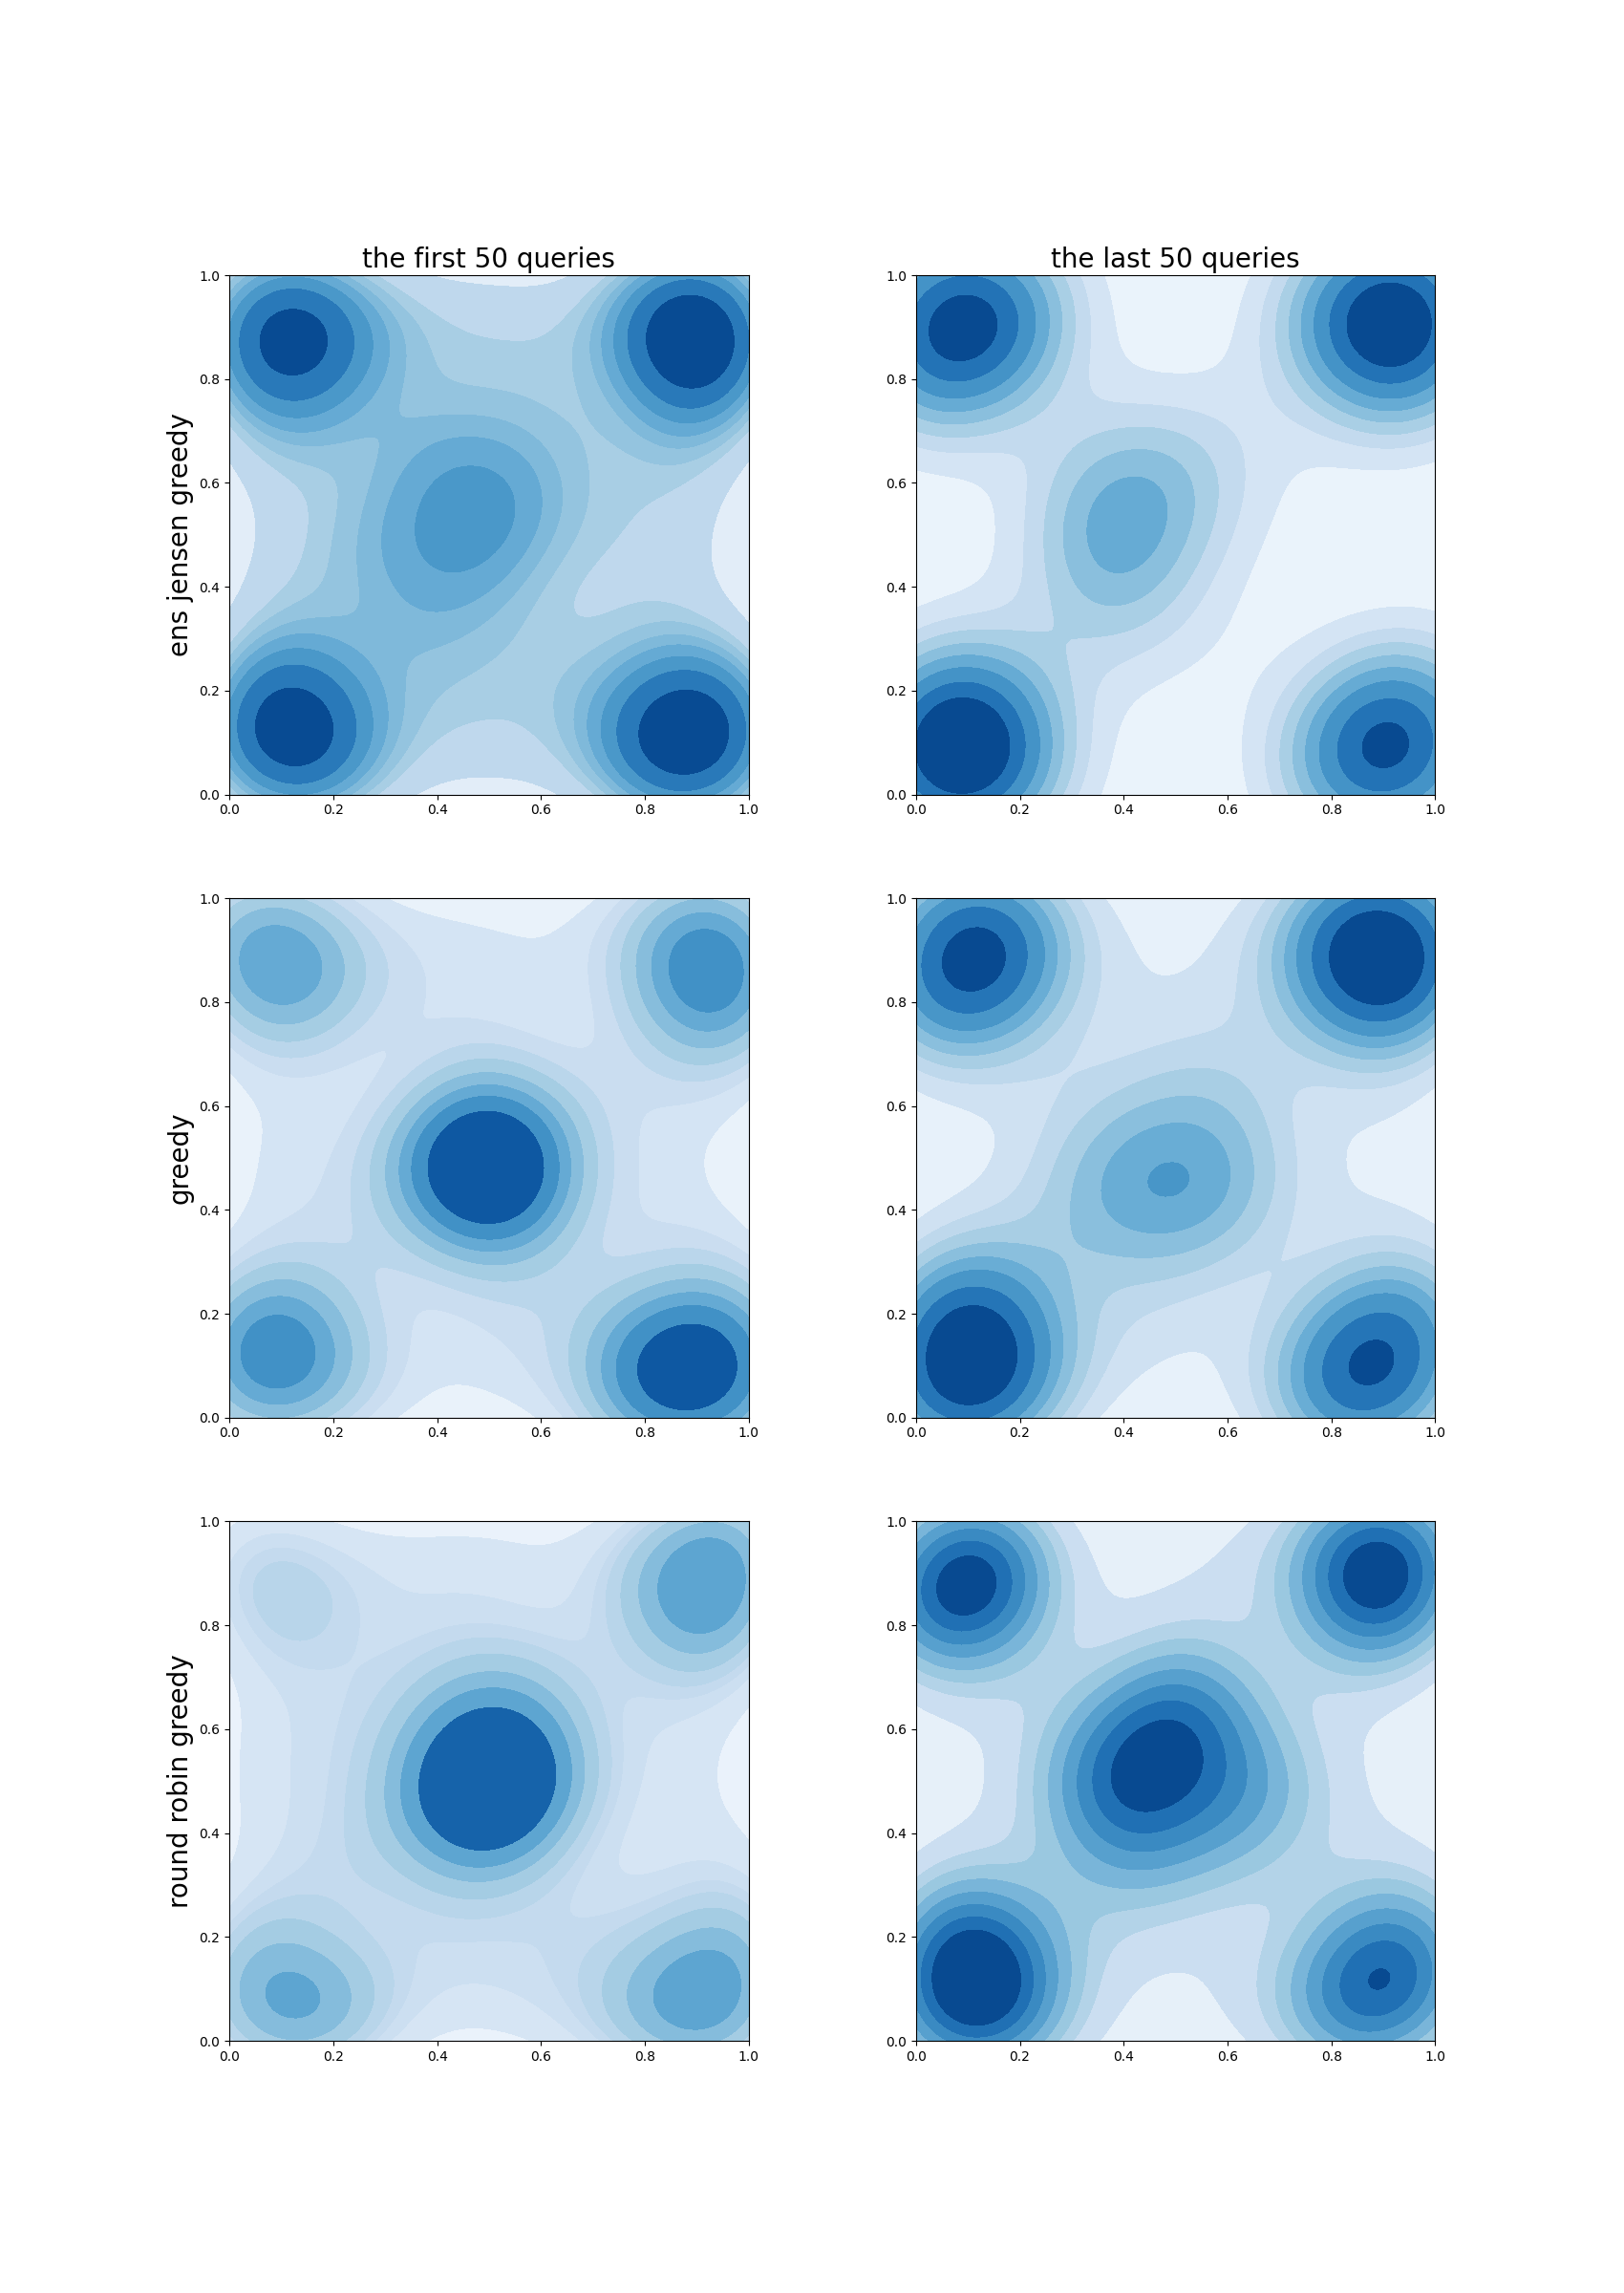

In [3]:
fig, ax = plt.subplots(len(policies), 2, figsize=(17, 8 * len(policies)))

for p_ind, policy in enumerate(policies):
    sns.kdeplot(
        x=queried_xs[p_ind, :, :50, 0].flatten(),
        y=queried_xs[p_ind, :, :50, 1].flatten(),
        ax=ax[p_ind, 0], fill=True, cmap='Blues', thresh=0
    )
    ax[p_ind, 0].set_xlim(0, 1)
    ax[p_ind, 0].set_ylim(0, 1)
    ax[p_ind, 0].set_aspect('equal', 'box')
    
    sns.kdeplot(
        x=queried_xs[p_ind, :, 50:, 0].flatten(),
        y=queried_xs[p_ind, :, 50:, 1].flatten(),
        ax=ax[p_ind, 1], fill=True, cmap='Blues', thresh=0
    )
    ax[p_ind, 1].set_xlim(0, 1)
    ax[p_ind, 1].set_ylim(0, 1)
    ax[p_ind, 1].set_aspect('equal', 'box')
    
    ax[p_ind, 0].set_ylabel(policy, fontsize=20)
    
ax[0, 0].set_title('the first 50 queries', fontsize=20)
ax[0, 1].set_title('the last 50 queries', fontsize=20);